In [1]:
import os
import requests
from dotenv import load_dotenv
import pandas as pd
import pandas_datareader as web
import datetime as dt
import numpy as np
from MCForecastTools import MCSimulation
import alpaca_trade_api as tradeapi

In [2]:
historical_start_date = dt.datetime(2016,8,1)
historical_end_date = dt.datetime(2021,7,31)

ADA_df = web.DataReader('ADA-USD','yahoo',historical_start_date,historical_end_date)
BCH_df = web.DataReader('BCH-USD','yahoo',historical_start_date,historical_end_date)
BNB_df = web.DataReader('BNB-USD','yahoo',historical_start_date,historical_end_date)
BTC_df = web.DataReader('BTC-USD','yahoo',historical_start_date,historical_end_date)
DOGE_df = web.DataReader('DOGE-USD','yahoo',historical_start_date,historical_end_date)
EOS_df = web.DataReader('EOS-USD','yahoo',historical_start_date,historical_end_date)
ETC_df = web.DataReader('ETC-USD','yahoo',historical_start_date,historical_end_date)
ETH_df = web.DataReader('ETH-USD','yahoo',historical_start_date,historical_end_date)
FIL_df = web.DataReader('FIL-USD','yahoo',historical_start_date,historical_end_date)
LINK_df = web.DataReader('LINK-USD','yahoo',historical_start_date,historical_end_date)
LTC_df = web.DataReader('LTC-USD','yahoo',historical_start_date,historical_end_date)
MKR_df = web.DataReader('MKR-USD','yahoo',historical_start_date,historical_end_date)
THETA_df = web.DataReader('THETA-USD','yahoo',historical_start_date,historical_end_date)
TRX_df = web.DataReader('TRX-USD','yahoo',historical_start_date,historical_end_date)
VET_df = web.DataReader('VET-USD','yahoo',historical_start_date,historical_end_date)
XLM_df = web.DataReader('XLM-USD','yahoo',historical_start_date,historical_end_date)
XMR_df = web.DataReader('XMR-USD','yahoo',historical_start_date,historical_end_date)
XRP_df = web.DataReader('XRP-USD','yahoo',historical_start_date,historical_end_date)
SPX_df = web.DataReader('sp500','fred',historical_start_date,historical_end_date)

ADA_df = ADA_df.loc[~ADA_df.index.duplicated(keep='first')]
BCH_df = BCH_df.loc[~BCH_df.index.duplicated(keep='first')]
BNB_df = BNB_df.loc[~BNB_df.index.duplicated(keep='first')]
BTC_df = BTC_df.loc[~BTC_df.index.duplicated(keep='first')]
DOGE_df = DOGE_df.loc[~DOGE_df.index.duplicated(keep='first')]
EOS_df = EOS_df.loc[~EOS_df.index.duplicated(keep='first')]
ETC_df = ETC_df.loc[~ETC_df.index.duplicated(keep='first')]
ETH_df = ETH_df.loc[~ETH_df.index.duplicated(keep='first')]
FIL_df = FIL_df.loc[~FIL_df.index.duplicated(keep='first')]
LINK_df = LINK_df.loc[~LINK_df.index.duplicated(keep='first')]
LTC_df = LTC_df.loc[~LTC_df.index.duplicated(keep='first')]
MKR_df = MKR_df.loc[~MKR_df.index.duplicated(keep='first')]
THETA_df = THETA_df.loc[~THETA_df.index.duplicated(keep='first')]
TRX_df = TRX_df.loc[~TRX_df.index.duplicated(keep='first')]
VET_df = VET_df.loc[~VET_df.index.duplicated(keep='first')]
XLM_df = XLM_df.loc[~XLM_df.index.duplicated(keep='first')]
XMR_df = XMR_df.loc[~XMR_df.index.duplicated(keep='first')]
XRP_df = XRP_df.loc[~XRP_df.index.duplicated(keep='first')]
SPX_df = SPX_df.loc[~SPX_df.index.duplicated(keep='first')]


In [3]:
ADA_close_df = ADA_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
BCH_close_df = BCH_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
BNB_close_df = BNB_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
BTC_close_df = BTC_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
DOGE_close_df = DOGE_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
EOS_close_df = EOS_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
ETC_close_df = ETC_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
ETH_close_df = ETH_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
FIL_close_df = FIL_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
LINK_close_df = LINK_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
LTC_close_df = LTC_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
MKR_close_df = MKR_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
THETA_close_df = THETA_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
TRX_close_df = TRX_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
VET_close_df = VET_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
XLM_close_df = XLM_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
XMR_close_df = XMR_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
XRP_close_df = XRP_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
SPX_close_df = SPX_df[['sp500']].rename({'sp500':'sp500 close'}, axis=1).reset_index()


In [5]:

to_merge_dict = {'ADA': ADA_close_df, 'BCH': BCH_close_df, 'BNB': BNB_close_df, 'BTC': BTC_close_df, 'DOGE': DOGE_close_df, 
                 'EOS': EOS_close_df, 'ETC': ETC_close_df, 'ETH': ETH_close_df, 
                 'FIL': FIL_close_df, 'LINK': LINK_close_df, 'LTC': LTC_close_df, 
                 'MKR': MKR_close_df, 'THETA': THETA_close_df, 'TRX': TRX_close_df,
                 'VET': VET_close_df, 'XLM': XLM_close_df, 'XMR': XMR_close_df, 
                 'XRP': XRP_close_df}
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())
merged_df = merged_df.dropna()
merged_df

ADA                  BCH                    BNB             \
           Date     close       Date       close       Date      close   
0    2017-09-30  0.024969 2017-07-22  413.059998 2017-07-24   0.105870   
1    2017-10-01  0.025932 2017-07-23  440.700989 2017-07-25   0.105138   
2    2017-10-02  0.020816 2017-07-24  406.897003 2017-07-26   0.107737   
3    2017-10-03  0.021931 2017-07-25  365.816010 2017-07-27   0.104067   
4    2017-10-04  0.021489 2017-07-26  385.479004 2017-07-28   0.107811   
...         ...       ...        ...         ...        ...        ...   
1074 2020-09-12  0.094856 2020-07-04  221.843277 2020-07-06  16.770226   
1075 2020-09-13  0.096769 2020-07-05  241.632095 2020-07-07  17.227657   
1076 2020-09-14  0.093496 2020-07-06  237.146729 2020-07-08  16.884869   
1077 2020-09-15  0.091650 2020-07-07  243.230209 2020-07-09  17.261251   
1078 2020-09-16  0.094217 2020-07-08  238.855850 2020-07-10  17.622179   

            BTC                     DOGE            ...        TRX            \
           Date         close       Date     close  ...       Date     close   
0    2016-07-31    606.271973 2016-07-31  0.000223  ... 2017-09-12  0.001988   
1    2016-08-01    547.465027 2016-08-01  0.000206  ... 2017-09-13  0.001427   
2    2016-08-02    566.354980 2016-08-02  0.000214  ... 2017-09-14  0.001801   
3    2016-08-03    578.289001 2016-08-03  0.000215  ... 2017-09-15  0.001831   
4    2016-08-04    575.043030 2016-08-04  0.000218  ... 2017-09-16  0.003320   
...         ...           ...        ...       ...  ...        ...       ...   
1074 2019-07-13  10256.058594 2019-07-13  0.003014  ... 2020-08-25  0.023747   
1075 2019-07-14  10895.089844 2019-07-14  0.003092  ... 2020-08-26  0.023100   
1076 2019-07-15   9477.641602 2019-07-15  0.002825  ... 2020-08-27  0.023981   
1077 2019-07-16   9693.802734 2019-07-16  0.003030  ... 2020-08-28  0.025038   
1078 2019-07-17  10666.482422 2019-07-17  0.003121  ... 2020-08-29  0.026952   

            VET                  XLM                  XMR             \
           Date     close       Date     close       Date      close   
0    2018-08-02  0.015307 2016-07-31  0.001874 2016-07-31   1.696270   
1    2018-08-03  0.013333 2016-08-01  0.001736 2016-08-01   1.485210   
2    2018-08-04  0.014081 2016-08-02  0.001804 2016-08-02   1.574810   
3    2018-08-05  0.013424 2016-08-03  0.001879 2016-08-03   1.849210   
4    2018-08-06  0.012899 2016-08-04  0.001900 2016-08-04   1.792560   
...         ...       ...        ...       ...        ...        ...   
1074 2021-07-27  0.082563 2019-07-13  0.086249 2019-07-13  85.917221   
1075 2021-07-28  0.082462 2019-07-14  0.086490 2019-07-14  89.496063   
1076 2021-07-29  0.085846 2019-07-15  0.078318 2019-07-15  74.016220   
1077 2021-07-30  0.089586 2019-07-16  0.080627 2019-07-16  76.458504   
1078 2021-07-31  0.085917 2019-07-17  0.088882 2019-07-17  84.121048   

            XRP            
           Date     close  
0    2016-07-31  0.005906  
1    2016-08-01  0.005690  
2    2016-08-02  0.005646  
3    2016-08-03  0.005816  
4    2016-08-04  0.006447  
...         ...       ...  
1074 2019-07-13  0.306426  
1075 2019-07-14  0.315310  
1076 2019-07-15  0.296726  
1077 2019-07-16  0.310613  
1078 2019-07-17  0.323176  

[1079 rows x 36 columns]

In [6]:
ADA = {'ada': ADA_close_df}
BCH = {'bch': BCH_close_df}
BNB = {'bnb': BNB_close_df}
BTC = {'btc': BTC_close_df}
DOGE = {'doge': DOGE_close_df}
EOS = {'eos': EOS_close_df}
ETC = {'etc': ETC_close_df}
ETH = {'eth': ETH_close_df}
FIL = {'fil': FIL_close_df}
LINK = {'link': LINK_close_df}
LTC = {'ltc': LTC_close_df}
MKR = {'mkr': MKR_close_df}
THETA = {'theta': THETA_close_df}
TRX = {'trx': TRX_close_df}
VET = {'vet': VET_close_df}
XLM = {'xlm': XLM_close_df}
XMR = {'xmr': XMR_close_df}
XRP = {'xrp': XRP_close_df}
SPX = {'spx': SPX_close_df}

    

In [7]:
ADA_DF=pd.concat(ADA.values(), axis=1, keys=ADA.keys())
BCH_DF=pd.concat(BCH.values(), axis=1, keys=BCH.keys())
BNB_DF=pd.concat(BNB.values(), axis=1, keys=BNB.keys())
BTC_DF=pd.concat(BTC.values(), axis=1, keys=BTC.keys())
DOGE_DF=pd.concat(DOGE.values(), axis=1, keys=DOGE.keys())
EOS_DF=pd.concat(EOS.values(), axis=1, keys=EOS.keys())
ETC_DF=pd.concat(ETC.values(), axis=1, keys=ETC.keys())
ETH_DF=pd.concat(ETH.values(), axis=1, keys=ETH.keys())
FIL_DF=pd.concat(FIL.values(), axis=1, keys=FIL.keys())
LINK_DF=pd.concat(LINK.values(), axis=1, keys=LINK.keys())
LTC_DF=pd.concat(LTC.values(), axis=1, keys=LTC.keys())
MKR_DF=pd.concat(MKR.values(), axis=1, keys=MKR.keys())
THETA_DF=pd.concat(THETA.values(), axis=1, keys=THETA.keys())
TRX_DF=pd.concat(TRX.values(), axis=1, keys=TRX.keys())
VET_DF=pd.concat(VET.values(), axis=1, keys=VET.keys())
XLM_DF=pd.concat(XLM.values(), axis=1, keys=XLM.keys())
XMR_DF=pd.concat(XMR.values(), axis=1, keys=XMR.keys())
XRP_DF=pd.concat(XRP.values(), axis=1, keys=XRP.keys())



In [10]:
portfolio = [
    ADA_DF,
    BNB_DF,
    BCH_DF,
    BTC_DF,
    DOGE_DF,
    EOS_DF,
    ETC_DF,
    ETH_DF,
    FIL_DF,
    LINK_DF,
    LTC_DF,
    MKR_DF,
    THETA_DF,
    TRX_DF,
    VET_DF,
    XLM_DF,
    XMR_DF,
    XRP_DF

]


In [25]:
cum_ret = []
for x in portfolio:
    coin_mcsim_equal = MCSimulation(portfolio_data = x, 
                                weights = [1],
                                num_simulation = 100,
                                num_trading_days = 900)

    cumulative_return = coin_mcsim_equal.calc_cumulative_return().mean()
    cum_ret.append(cumulative_return.iloc[-1])

cum_ret_df = pd.DataFrame(cum_ret)
cum_ret_names=cum_ret_df.rename(index={0: 'ADA', 1: 'BCH', 2: 'BNB', 3: 'BTC',4:'DOGE',5:'EOS',6:'ETC',7:'ETH',8:'FIL',9:'LNK',10:'LTC',11:'MKR',12:'THETA',13:'TRX',14:'VET',15:'XLM',16:'XMR',17:'XRP'})
cum_ret_names.columns=['Cumulative Return']
cum_ret_names

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number

,Cumulative Return
ADA,4.440835
BCH,344.241228
BNB,4.072151
BTC,24.044121
DOGE,0.501558
EOS,0.319254
ETC,0.780016
ETH,2.203289
FIL,0.417865
LNK,6.006475


In [26]:
cum_ret_names.sort_values(by=['Cumulative Return'])

,Cumulative Return
MKR,0.002622
EOS,0.319254
FIL,0.417865
DOGE,0.501558
VET,0.692506
ETC,0.780016
XLM,1.356666
THETA,2.147620
ETH,2.203289
XMR,2.497565


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 900 Trading Days.'}>

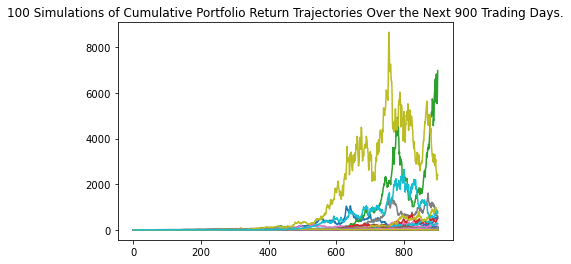

In [27]:
coin_mcsim_equal.plot_simulation()

In [15]:
cumulative_return.iloc[-1].sort_values()

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

In [ ]:
cumulative_return

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

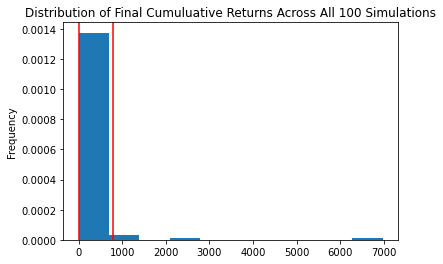

In [28]:
coin_mcsim_equal.plot_distribution()

In [29]:
coin_mcsim_equal.summarize_cumulative_return()

count            100.000000
mean             151.535900
std              744.117155
min                0.017948
25%                0.715719
50%                4.272580
75%               32.766430
max             6981.077107
95% CI Lower       0.042910
95% CI Upper     779.947238
Name: 900, dtype: float64

In [30]:
ADA_close_df = ADA_df[['Close']].rename({'Close':'ADA_Close'}, axis=1)
BCH_close_df = BCH_df[['Close']].rename({'Close':'BCH_Close'}, axis=1)
BNB_close_df = BNB_df[['Close']].rename({'Close':'BNB_Close'}, axis=1)
BTC_close_df = BTC_df[['Close']].rename({'Close':'BTC_Close'}, axis=1)
DOGE_close_df = DOGE_df[['Close']].rename({'Close':'DOGE_Close'}, axis=1)
EOS_close_df = EOS_df[['Close']].rename({'Close':'EOS_Close'}, axis=1)
ETC_close_df = ETC_df[['Close']].rename({'Close':'ETC_Close'}, axis=1)
ETH_close_df = ETH_df[['Close']].rename({'Close':'ETH_Close'}, axis=1)
FIL_close_df = FIL_df[['Close']].rename({'Close':'FIL_Close'}, axis=1)
LINK_close_df = LINK_df[['Close']].rename({'Close':'LINK_Close'}, axis=1)
LTC_close_df = LTC_df[['Close']].rename({'Close':'LTC_Close'}, axis=1)
MKR_close_df = MKR_df[['Close']].rename({'Close':'MKR_Close'}, axis=1)
THETA_close_df = THETA_df[['Close']].rename({'Close':'THETA_Close'}, axis=1)
TRX_close_df = TRX_df[['Close']].rename({'Close':'TRX_Close'}, axis=1)
VET_close_df = VET_df[['Close']].rename({'Close':'VET_Close'}, axis=1)
XLM_close_df = XLM_df[['Close']].rename({'Close':'XLM_Close'}, axis=1)
XMR_close_df = XMR_df[['Close']].rename({'Close':'XMR_Close'}, axis=1)
XRP_close_df = XRP_df[['Close']].rename({'Close':'XRP_Close'}, axis=1)
SPX_close_df = SPX_df[['sp500']].rename({'sp500':'SPX_Close'}, axis=1)

select_coin_close_df = pd.concat([ADA_close_df,BCH_close_df,BNB_close_df,BTC_close_df,DOGE_close_df,EOS_close_df,
                                 ETC_close_df,ETH_close_df,FIL_close_df,LINK_close_df,LTC_close_df,MKR_close_df,
                                 THETA_close_df,TRX_close_df,VET_close_df,XLM_close_df,XMR_close_df,XRP_close_df],axis=1).dropna()
display(select_coin_close_df.count())
display(select_coin_close_df)

ADA_Close      925
BCH_Close      925
BNB_Close      925
BTC_Close      925
DOGE_Close     925
EOS_Close      925
ETC_Close      925
ETH_Close      925
FIL_Close      925
LINK_Close     925
LTC_Close      925
MKR_Close      925
THETA_Close    925
TRX_Close      925
VET_Close      925
XLM_Close      925
XMR_Close      925
XRP_Close      925
dtype: int64

,ADA_Close,BCH_Close,BNB_Close,BTC_Close,DOGE_Close,EOS_Close,ETC_Close,ETH_Close,FIL_Close,LINK_Close,LTC_Close,MKR_Close,THETA_Close,TRX_Close,VET_Close,XLM_Close,XMR_Close,XRP_Close
Date,,,,,,,,,,,,,,,,,,
2018-08-02,0.130255,724.708008,14.134600,7434.390137,0.002918,7.202850,16.598700,418.261993,6.360740,0.284746,77.535500,556.268005,0.111182,0.030602,0.015307,0.258956,120.018997,0.440571
2018-08-03,0.127547,695.734985,13.842400,7032.850098,0.002745,6.986370,16.415899,407.252014,5.722630,0.257989,73.198700,548.793030,0.107940,0.028932,0.013333,0.240724,113.992996,0.428507
2018-08-04,0.131721,709.218994,13.623200,7068.479980,0.002837,7.055770,17.693300,410.515991,6.386480,0.253947,74.589401,564.684021,0.121062,0.030329,0.014081,0.244218,117.274002,0.433638
2018-08-05,0.130553,692.630005,13.699100,6951.799805,0.002779,7.071970,18.664801,406.657990,6.299870,0.236471,73.888298,542.181030,0.116597,0.029228,0.013424,0.234705,113.544998,0.414081
2018-08-06,0.125378,659.383972,13.146100,6753.120117,0.002671,6.608150,17.326401,380.214996,5.595460,0.233997,68.170303,518.840027,0.107377,0.027866,0.012899,0.230672,108.039001,0.381006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,1.283504,510.144501,313.428650,39995.906250,0.205392,3.900478,49.170399,2296.545410,49.517242,19.030273,139.836609,2653.447998,5.798518,0.060517,0.082563,0.268934,234.796310,0.725445
2021-07-28,1.284084,538.303162,316.749451,40008.421875,0.204619,3.959456,49.248177,2380.956787,49.371132,19.345850,141.321289,2895.585693,6.033056,0.061772,0.082462,0.272297,241.229172,0.748017
2021-07-29,1.308952,552.738708,322.909363,42235.546875,0.208821,4.070299,51.088840,2466.961426,51.307907,22.315962,145.775024,2917.430420,5.989395,0.063272,0.085846,0.279421,242.797791,0.752119


In [31]:
coin_daily_returns = select_coin_close_df.pct_change().dropna()
coin_daily_returns

,ADA_Close,BCH_Close,BNB_Close,BTC_Close,DOGE_Close,EOS_Close,ETC_Close,ETH_Close,FIL_Close,LINK_Close,LTC_Close,MKR_Close,THETA_Close,TRX_Close,VET_Close,XLM_Close,XMR_Close,XRP_Close
Date,,,,,,,,,,,,,,,,,,
2018-08-03,-0.020790,-0.039979,-0.020673,-0.054011,-0.059287,-0.030055,-0.011013,-0.026323,-0.100320,-0.093968,-0.055933,-0.013438,-0.029159,-0.054572,-0.128961,-0.070406,-0.050209,-0.027383
2018-08-04,0.032725,0.019381,-0.015835,0.005066,0.033515,0.009934,0.077815,0.008015,0.116004,-0.015667,0.018999,0.028956,0.121568,0.048286,0.056101,0.014515,0.028783,0.011974
2018-08-05,-0.008867,-0.023391,0.005571,-0.016507,-0.020444,0.002296,0.054908,-0.009398,-0.013561,-0.068817,-0.009400,-0.039851,-0.036882,-0.036302,-0.046659,-0.038953,-0.031797,-0.045100
2018-08-06,-0.039639,-0.048000,-0.040368,-0.028580,-0.038863,-0.065586,-0.071707,-0.065025,-0.111813,-0.010462,-0.077387,-0.043050,-0.079076,-0.046599,-0.039109,-0.017183,-0.048492,-0.079876
2018-08-07,-0.092728,-0.112132,-0.076251,-0.066239,-0.095844,-0.153365,-0.126241,-0.062075,0.005773,-0.025458,-0.083319,-0.018142,-0.047831,-0.121438,-0.164586,-0.127111,-0.125000,-0.128770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,0.003956,0.015627,-0.000555,0.014946,-0.002462,0.038814,-0.005743,-0.000778,-0.002415,-0.024070,0.038767,-0.012075,-0.029326,0.005617,-0.015114,0.022081,0.038465,0.125412
2021-07-28,0.000452,0.055197,0.010595,0.000313,-0.003764,0.015121,0.001582,0.036756,-0.002951,0.016583,0.010617,0.091254,0.040448,0.020738,-0.001223,0.012505,0.027398,0.031115
2021-07-29,0.019366,0.026817,0.019447,0.055666,0.020536,0.027995,0.037375,0.036122,0.039229,0.153527,0.031515,0.007544,-0.007237,0.024283,0.041037,0.026163,0.006503,0.005484


In [32]:
coin_daily_mean_return = coin_daily_returns.mean()
coin_daily_mean_return

ADA_Close      0.012861
BCH_Close      0.002184
BNB_Close      0.012643
BTC_Close      0.004584
DOGE_Close     0.027445
EOS_Close      0.001737
ETC_Close      0.003829
ETH_Close      0.005792
FIL_Close      0.012164
LINK_Close     0.007935
LTC_Close      0.003443
MKR_Close      0.005508
THETA_Close    0.021908
TRX_Close      0.003641
VET_Close      0.009427
XLM_Close      0.004256
XMR_Close      0.002450
XRP_Close      0.002554
dtype: float64

In [33]:
coin_annual_mean_return = coin_daily_mean_return*select_coin_close_df.count()
coin_annual_mean_return

ADA_Close      11.896824
BCH_Close       2.020422
BNB_Close      11.694454
BTC_Close       4.240486
DOGE_Close     25.387016
EOS_Close       1.606677
ETC_Close       3.542166
ETH_Close       5.357198
FIL_Close      11.252054
LINK_Close      7.339664
LTC_Close       3.185112
MKR_Close       5.094571
THETA_Close    20.265084
TRX_Close       3.367811
VET_Close       8.719679
XLM_Close       3.936489
XMR_Close       2.266445
XRP_Close       2.362054
dtype: float64

In [34]:
coin_annual_std = coin_daily_returns.std()*np.sqrt(select_coin_close_df.count())
coin_annual_std

ADA_Close      10.704584
BCH_Close       2.293570
BNB_Close       9.726643
BTC_Close       3.524959
DOGE_Close     22.271780
EOS_Close       2.222254
ETC_Close       2.506549
ETH_Close       4.189844
FIL_Close       5.751372
LINK_Close      2.671037
LTC_Close       2.998819
MKR_Close       3.494529
THETA_Close    16.789641
TRX_Close       2.826540
VET_Close       7.142779
XLM_Close       4.568135
XMR_Close       1.832947
XRP_Close       2.131397
dtype: float64

In [35]:
coin_sharpe_ratio = coin_annual_mean_return/coin_annual_std
coin_sharpe_ratio

ADA_Close      1.111377
BCH_Close      0.880907
BNB_Close      1.202311
BTC_Close      1.202989
DOGE_Close     1.139874
EOS_Close      0.722994
ETC_Close      1.413164
ETH_Close      1.278615
FIL_Close      1.956412
LINK_Close     2.747871
LTC_Close      1.062122
MKR_Close      1.457871
THETA_Close    1.206999
TRX_Close      1.191496
VET_Close      1.220768
XLM_Close      0.861728
XMR_Close      1.236503
XRP_Close      1.108218
dtype: float64

In [ ]:
select_coin_close_df

In [36]:
spx_coin_close_df = pd.concat([ADA_close_df,BCH_close_df,BNB_close_df,BTC_close_df,DOGE_close_df,EOS_close_df,ETC_close_df,
                               ETH_close_df,FIL_close_df,LINK_close_df,LTC_close_df,MKR_close_df,THETA_close_df,TRX_close_df,
                               VET_close_df,XLM_close_df,XMR_close_df,XRP_close_df,SPX_close_df],axis=1).dropna()
display(spx_coin_close_df.count())
display(spx_coin_close_df)

ADA_Close      639
BCH_Close      639
BNB_Close      639
BTC_Close      639
DOGE_Close     639
EOS_Close      639
ETC_Close      639
ETH_Close      639
FIL_Close      639
LINK_Close     639
LTC_Close      639
MKR_Close      639
THETA_Close    639
TRX_Close      639
VET_Close      639
XLM_Close      639
XMR_Close      639
XRP_Close      639
SPX_Close      639
dtype: int64

,ADA_Close,BCH_Close,BNB_Close,BTC_Close,DOGE_Close,EOS_Close,ETC_Close,ETH_Close,FIL_Close,LINK_Close,LTC_Close,MKR_Close,THETA_Close,TRX_Close,VET_Close,XLM_Close,XMR_Close,XRP_Close,SPX_Close
2018-08-02,0.130255,724.708008,14.134600,7434.390137,0.002918,7.202850,16.598700,418.261993,6.360740,0.284746,77.535500,556.268005,0.111182,0.030602,0.015307,0.258956,120.018997,0.440571,2827.22
2018-08-03,0.127547,695.734985,13.842400,7032.850098,0.002745,6.986370,16.415899,407.252014,5.722630,0.257989,73.198700,548.793030,0.107940,0.028932,0.013333,0.240724,113.992996,0.428507,2840.35
2018-08-06,0.125378,659.383972,13.146100,6753.120117,0.002671,6.608150,17.326401,380.214996,5.595460,0.233997,68.170303,518.840027,0.107377,0.027866,0.012899,0.230672,108.039001,0.381006,2850.40
2018-08-07,0.113752,585.445984,12.143700,6305.799805,0.002415,5.594690,15.139100,356.613007,5.627760,0.228040,62.490398,509.427002,0.102241,0.024482,0.010776,0.201351,94.534103,0.331944,2858.45
2018-08-08,0.123507,610.781006,12.858000,6568.229980,0.002555,5.802310,15.105500,365.588013,5.588090,0.276128,63.980801,515.289001,0.108233,0.025941,0.011683,0.221435,100.532997,0.346771,2857.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,1.278446,502.295166,313.602600,39406.941406,0.205899,3.754743,49.454422,2298.333496,49.637131,19.499634,134.617874,2685.879150,5.973704,0.060179,0.083830,0.263124,226.099503,0.644604,4422.30
2021-07-27,1.283504,510.144501,313.428650,39995.906250,0.205392,3.900478,49.170399,2296.545410,49.517242,19.030273,139.836609,2653.447998,5.798518,0.060517,0.082563,0.268934,234.796310,0.725445,4401.46
2021-07-28,1.284084,538.303162,316.749451,40008.421875,0.204619,3.959456,49.248177,2380.956787,49.371132,19.345850,141.321289,2895.585693,6.033056,0.061772,0.082462,0.272297,241.229172,0.748017,4400.64
2021-07-29,1.308952,552.738708,322.909363,42235.546875,0.208821,4.070299,51.088840,2466.961426,51.307907,22.315962,145.775024,2917.430420,5.989395,0.063272,0.085846,0.279421,242.797791,0.752119,4419.15


In [37]:
spx_coin_daily_returns = spx_coin_close_df.pct_change().dropna()
btc_daily_returns = spx_coin_close_df["BTC_Close"].pct_change().dropna()
btc_daily_returns

2018-08-03   -0.054011
2018-08-06   -0.039775
2018-08-07   -0.066239
2018-08-08    0.041617
2018-08-09   -0.058390
                ...   
2021-07-26    0.149144
2021-07-27    0.014946
2021-07-28    0.000313
2021-07-29    0.055666
2021-07-30   -0.014427
Name: BTC_Close, Length: 638, dtype: float64

In [38]:
spx_daily_returns = spx_coin_close_df["SPX_Close"].pct_change().dropna()
spx_daily_returns

2018-08-03    0.004644
2018-08-06    0.003538
2018-08-07    0.002824
2018-08-08   -0.000262
2018-08-09   -0.001442
                ...   
2021-07-26    0.002382
2021-07-27   -0.004712
2021-07-28   -0.000186
2021-07-29    0.004206
2021-07-30   -0.005406
Name: SPX_Close, Length: 638, dtype: float64

In [39]:
spx_variance = spx_daily_returns.var()
spx_variance

0.00027902159805527486

In [40]:
btc_variance = btc_daily_returns.var()
btc_variance

0.019356811537232694

In [41]:
btc_covariance = btc_daily_returns.cov(spx_daily_returns)
btc_covariance

0.0009963863246347496

In [42]:
BTC_close_df.describe()

,BTC_Close
count,1818.000000
mean,11219.540207
std,13169.767917
min,547.465027
25%,3860.791565
50%,7557.028809
75%,10680.412598
max,63503.457031


In [43]:
SPX_close_df.describe()

,SPX_Close
count,1259.000000
mean,2920.061906
std,550.453704
min,2085.180000
25%,2523.130000
50%,2809.920000
75%,3190.640000
max,4422.300000


In [44]:
XRP_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1818.000000,1818.000000,1818.000000,1818.000000,1.818000e+03,1818.000000
mean,0.394446,0.355189,0.375199,0.375629,2.028285e+09,0.375629
std,0.398869,0.333942,0.366369,0.366390,3.762417e+09,0.366390
min,0.005547,0.005372,0.005419,0.005408,2.304790e+05,0.005408
25%,0.203869,0.193850,0.199249,0.200110,2.015308e+08,0.200110
50%,0.297196,0.275755,0.284466,0.284705,9.590357e+08,0.284705
75%,0.470923,0.443200,0.456402,0.457101,2.026624e+09,0.457101
max,3.841940,3.117340,3.363570,3.377810,3.695518e+10,3.377810


In [46]:
BCH_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1463.000000,1463.000000,1463.000000,1463.000000,1.463000e+03,1463.000000
mean,565.765181,507.025886,536.851836,536.638092,2.020589e+09,536.638092
std,519.063380,438.393586,479.628829,479.210911,2.261201e+09,479.210911
min,83.036423,75.075317,77.370895,77.365776,8.501300e+04,77.365776
25%,253.228333,236.846710,245.061218,244.574760,4.879065e+08,244.574760
50%,395.555206,354.650909,378.050507,378.030151,1.422464e+09,378.030151
75%,644.479980,572.806000,616.276489,616.775513,2.637998e+09,616.775513
max,4355.620117,3038.010010,3909.000000,3923.070068,2.957459e+10,3923.070068
